In [1]:
import pathlib

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import matplotlib.colors


%matplotlib inline

In [2]:
# Take the components from Frederikse for North Atlantic

path = pathlib.Path('~/src/sealevel/data/frederikse/global_basin_timeseries.xlsx').expanduser()
# select North Atlantic
df = pd.read_excel(path, sheet_name='Subpolar North Atlantic')
df = df.rename(columns={'Unnamed: 0': 'Year'}).set_index('Year')
df

,Observed basin-mean sea level [lower],Observed basin-mean sea level [mean],Observed basin-mean sea level [upper],Sum of contributors [lower],Sum of contributors [mean],Sum of contributors [upper],Steric [lower],Steric [mean],Steric [upper],Glaciers [lower],...,Antarctic Ice Sheet [upper],Terrestrial Water Storage [lower],Terrestrial Water Storage [mean],Terrestrial Water Storage [upper],GIA [lower],GIA [mean],GIA [upper],Altimetry [lower],Altimetry [mean],Altimetry [upper]
Year,,,,,,,,,,,,,,,,,,,,,
1900,-160.820332,-132.280831,-105.527197,NaN,NaN,NaN,NaN,NaN,NaN,-57.572083,...,-3.255308,1.092305,7.731746,14.422962,-87.602093,-68.595274,-51.299194,NaN,NaN,NaN
1901,-141.273932,-112.685669,-86.856559,NaN,NaN,NaN,NaN,NaN,NaN,-56.729462,...,-3.311504,3.263381,9.968461,16.763111,-86.805711,-67.971680,-50.832837,NaN,NaN,NaN
1902,-117.430882,-89.586338,-63.256155,NaN,NaN,NaN,NaN,NaN,NaN,-55.895473,...,-3.307185,5.087344,11.736305,18.604395,-86.009328,-67.348087,-50.366481,NaN,NaN,NaN
1903,-105.529606,-78.293904,-52.502778,NaN,NaN,NaN,NaN,NaN,NaN,-55.356213,...,-3.302397,5.382087,12.024152,18.746111,-85.212945,-66.724493,-49.900125,NaN,NaN,NaN
1904,-137.096941,-109.937881,-83.990299,NaN,NaN,NaN,NaN,NaN,NaN,-54.797943,...,-3.326219,4.071734,10.833353,17.465179,-84.416563,-66.100900,-49.433769,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,6.214692,15.486027,24.907405,2.873020,4.212708,5.452999,1.338207,1.687152,2.075938,1.007640,...,2.321594,-2.191920,-1.601791,-1.070264,1.864310,2.494374,3.185243,-0.797102,1.972713,4.779569
2015,-4.604160,4.932048,14.439107,0.721163,5.050379,11.473773,-6.514023,-3.326730,2.339439,1.656370,...,3.406453,1.264395,2.023855,2.689812,2.330387,3.117967,3.981553,0.245215,3.324302,6.393721
2016,0.699434,10.037873,19.548186,5.192671,9.366118,14.794479,-4.420944,-1.386825,3.089808,2.098596,...,3.267765,2.861227,3.744246,4.525959,2.796465,3.741560,4.777864,6.431427,9.464970,12.609309


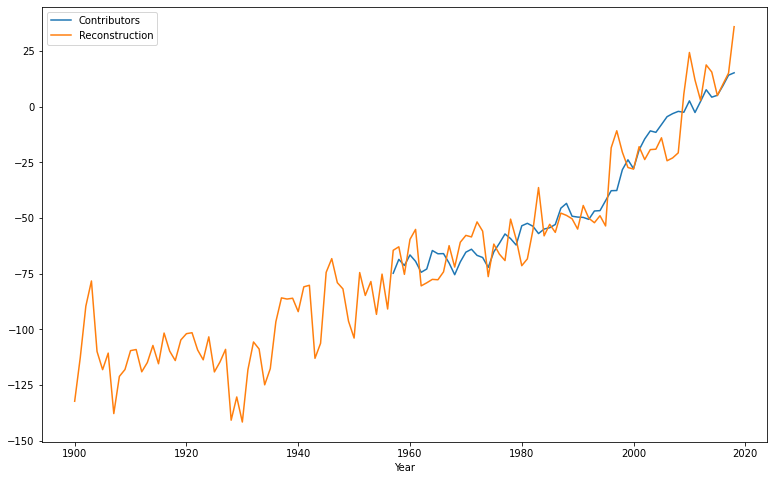

In [3]:
# double check if sum compares with reconstruction

fig, ax = plt.subplots(figsize=(13, 8))
df['Sum of contributors [mean]'].plot(label='Contributors', ax=ax)
df['Observed basin-mean sea level [mean]'].plot(label='Reconstruction', ax=ax)
ax.legend()

In [4]:
# lookup the components
[column for column in df.columns if 'mean' in column]

['Observed basin-mean sea level [lower]',
 'Observed basin-mean sea level [mean]',
 'Observed basin-mean sea level [upper]',
 'Sum of contributors [mean]',
 'Steric [mean]',
 'Glaciers [mean]',
 'Greenland Ice Sheet [mean]',
 'Antarctic Ice Sheet [mean]',
 'Terrestrial Water Storage [mean]',
 'GIA [mean]',
 'Altimetry [mean]']

In [5]:
# select the contributor columns
contributor_columns = [f'{column} [mean]' for column in ['Steric', 'Glaciers', 'Greenland Ice Sheet', 'Antarctic Ice Sheet', 'Terrestrial Water Storage', 'GIA'] if f'{column} [mean]' in df.columns] 
contributor_columns

['Steric [mean]',
 'Glaciers [mean]',
 'Greenland Ice Sheet [mean]',
 'Antarctic Ice Sheet [mean]',
 'Terrestrial Water Storage [mean]',
 'GIA [mean]']

<AxesSubplot:xlabel='Year'>

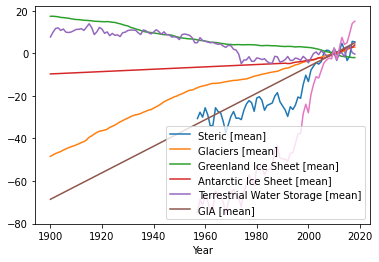

In [6]:
# plot all components
frederikse_df = df[contributor_columns].copy()

fig, ax = plt.subplots()
frederikse_df.plot(ax=ax)
df['Sum of contributors [mean]'].plot(label='sum', ax=ax)


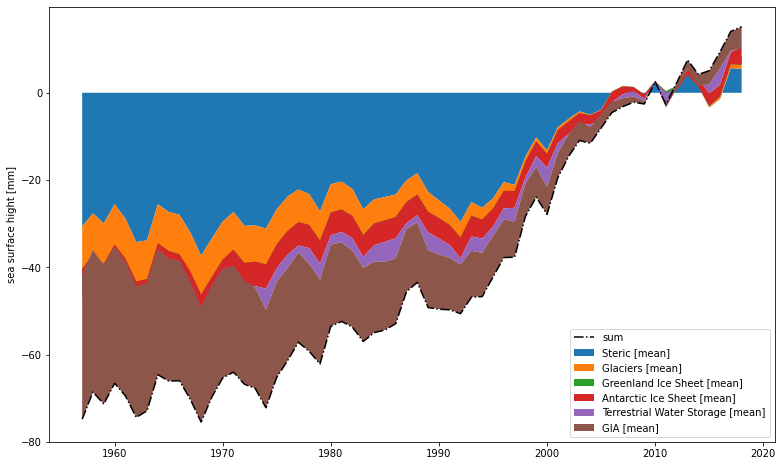

In [7]:
# combine all columns in ordinary stackplot
fig, ax = plt.subplots(figsize=(13, 8))

ax.stackplot(frederikse_df.index, frederikse_df.T, labels=frederikse_df.columns)
ax.set_ylabel('sea surface hight [mm]')
ax.plot(df.index, df['Sum of contributors [mean]'], 'k-.', label='sum')
ax.legend(loc='lower right')


In [8]:
rgbas = matplotlib.cm.Set2(np.arange(len(frederikse_df.columns)))
cmap = [matplotlib.colors.rgb2hex(rgba) for rgba in rgbas]

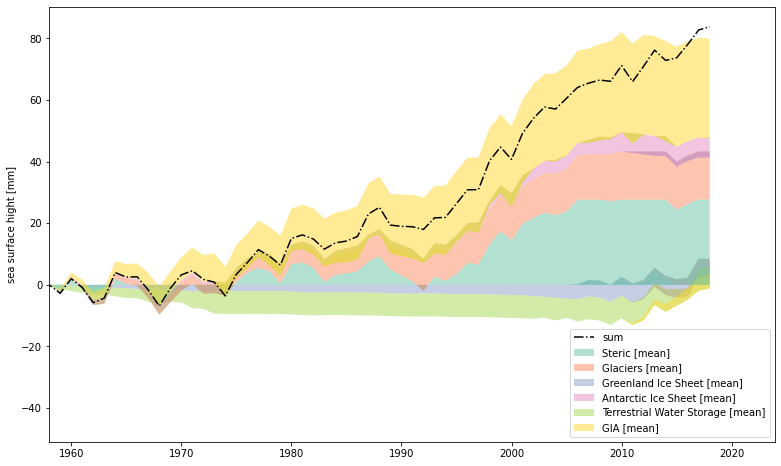

In [9]:
# Create  +- stackplot with consistent colors
fig, ax = plt.subplots(figsize=(13, 8))



frederikse_df_pos = frederikse_df[frederikse_df >= 0].fillna(0)
frederikse_df_pos -= frederikse_df_pos.loc[1958]
frederikse_df_neg = frederikse_df[frederikse_df < 0].fillna(0)
frederikse_df_neg -= frederikse_df_neg.loc[1958]
# create and format stackplot
ax.stackplot(frederikse_df_pos.index, frederikse_df_pos.values.T, alpha=0.5, labels=frederikse_df_pos.columns, colors=cmap)
ax.stackplot(frederikse_df_neg.index, frederikse_df_neg.values.T, alpha=0.5, colors=cmap)

ax.plot(df.index, df['Sum of contributors [mean]'] - df['Sum of contributors [mean]'].loc[1958], 'k-.', label='sum')
ax.set_xlim(1958, None)
ax.set_ylabel('sea surface hight [mm]')
ax.legend(loc='lower right')


In [10]:
#  check O() that all variables  are in mm
frederikse_df

,Steric [mean],Glaciers [mean],Greenland Ice Sheet [mean],Antarctic Ice Sheet [mean],Terrestrial Water Storage [mean],GIA [mean]
Year,,,,,,
1900,NaN,-48.410885,17.449970,-9.644024,7.731746,-68.595274
1901,NaN,-47.740761,17.490820,-9.588575,9.968461,-67.971680
1902,NaN,-47.062584,17.377077,-9.533146,11.736305,-67.348087
1903,NaN,-46.608883,17.231157,-9.477721,12.024152,-66.724493
1904,NaN,-46.135803,16.934866,-9.422289,10.833353,-66.100900
...,...,...,...,...,...,...
2014,1.687152,1.178301,-1.458346,1.897759,-1.601791,2.494374
2015,-3.326730,1.862801,-1.558061,2.882943,2.023855,3.117967
2016,-1.386825,2.316292,-1.732789,2.635025,3.744246,3.741560


In [11]:
# check with imbie
imbie_df = pd.read_csv('/Users/baart_f/src/sealevel/data/imbie/imbie_2018_2020_combined.csv').set_index('Year')

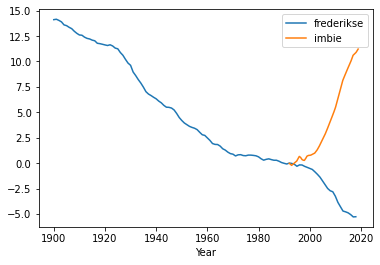

In [12]:
# greenland has oposite  effect (this is an underestimate for NL)
fig, ax = plt.subplots()
(frederikse_df['Greenland Ice Sheet [mean]'] - frederikse_df['Greenland Ice Sheet [mean]'].loc[1992]).plot(label='frederikse', ax=ax)
imbie_df.query("location == 'Greenland'")['Sea level contribution (mm)'].plot(label='imbie', ax=ax)
ax.legend()

<AxesSubplot:xlabel='Year'>

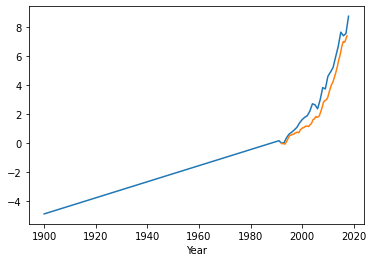

In [13]:
# this is a bit overestimated for nl (see reverse fingerprint)
fig, ax = plt.subplots()

(frederikse_df['Antarctic Ice Sheet [mean]'] - frederikse_df['Antarctic Ice Sheet [mean]'].loc[1992]).plot(label='frederikse', ax=ax)
imbie_df.query("location == 'Antarctica'")['Sea level contribution (mm)'].plot(label='imbie', ax=ax)

In [14]:
# remove invalid times (missing)
path = pathlib.Path('~/src/sealevel/data/frederikse/regional_north_antlantic.csv').expanduser()
frederikse_selected = frederikse_df.query('Year >= 1958')
frederikse_selected.to_csv(path)

# Add surge component from gtsm

In [15]:
# read reanalysis
path = pathlib.Path('~/src/sealevel/data/deltares/gtsm/reanalysis_mean_nl.csv').expanduser()

In [16]:
surge_df =pd.read_csv(path)


stations = [
    'NWS_NO_TS_MO_Harlingen', 
    'NWS_NO_TS_MO_Ijmuiden',
    'NWS_NO_TS_MO_Vlissingen', 
    'id_obs_delfzijl_del_nl_rws',
    'id_obs_denhelder_hel_nl_rws', 
    'id_obs_hoekvanholla_hvh_nl_rws'
]
surge_series = surge_df.query('variable == "surge"').set_index('time')[stations].mean(axis=1)
nl_mean_surge_df = pd.DataFrame(data=dict(Surge=surge_series, Year=[int(x[:4]) for x in surge_series.index]))
assert (nl_mean_surge_df.groupby('Year').count() == 12).all().Surge == True, "all years should finishing"

# m -> mm
nl_mean_annual_surge_df = nl_mean_surge_df.groupby('Year').mean() * 1000

nl_mean_annual_surge_df = nl_mean_annual_surge_df.rename(columns= {'Surge': 'Surge [mm]'})
nl_mean_annual_surge_df

,Surge [mm]
Year,
1979,41.709907
1980,38.094303
1981,71.965550
1982,45.450090
1983,81.926839
1984,35.335480
1985,39.818259
1986,45.198698
1987,17.946680


In [17]:
# combbine surge + other components
observed_components_df = pd.merge(nl_mean_annual_surge_df, frederikse_selected, left_index=True, right_index=True)
path = pathlib.Path('~/src/sealevel/data/deltares/observed_components_no_tide.csv').expanduser()
observed_components_df.to_csv(path)

# Tide

In [18]:
# use the tidal reanalys
# we might want to stick to observed nodal tide for now
# because the computed mean was off by 50%?, double check this later

data_dir = pathlib.Path('~/src/sealevel/data/deltares/gtsm/tidal_corrections').expanduser()
meta_path = data_dir / 'df_OLSmodelstats_year.csv'
tide_meta_df = pd.read_csv(meta_path)

In [19]:
# lookup psmsl id's
# DELFZIJL   24
# HARLINGEN    25
# DEN HELDER    23
# IJMUIDEN   32
# HOEK VAN HOLLAND   22
# VLISSINGEN    20
stations = [
    'psmsl-24',
    'psmsl-25',
    'psmsl-23',
    'psmsl-32',
    'psmsl-22',
    'psmsl-20'
]
set(stations) & set(tide_meta_df.station_name)

{'psmsl-20', 'psmsl-22', 'psmsl-23', 'psmsl-24', 'psmsl-25', 'psmsl-32'}

In [20]:
# combine  all stations
tide_dfs = []
for station in stations:
    path = data_dir / f'yearlymean_gtsm_{station}.csv'
    tide_df = pd.read_csv(path)
    tide_df['station'] = station
    tide_dfs.append(tide_df)

In [21]:
# ocmpute annual means
tide_annual_mean_df = pd.concat(tide_dfs)
tide_annual_mean_df = tide_annual_mean_df.rename(columns={'time [year]': 'Year', 'sea_surface_height_due_to_tide [m]': 'sea_surface_height_due_to_tide [mm]'})
tide_annual_mean_df['sea_surface_height_due_to_tide [mm]'] = tide_annual_mean_df['sea_surface_height_due_to_tide [mm]'] * 1000
tide_annual_mean_df = tide_annual_mean_df.groupby('Year').mean()


In [22]:
tide_annual_mean_df

,sea_surface_height_due_to_tide [mm]
Year,
1999,48.148928
2000,49.345859
2001,50.324102
2002,52.275469
2003,53.897119
2004,54.772786
2005,54.847681
2006,55.767911
2007,55.736738


In [23]:
#  combine (now we only have data since 1999)
observed_components_df = pd.merge(observed_components_df, tide_annual_mean_df, left_index=True, right_index=True)

In [24]:
path = pathlib.Path('~/src/sealevel/data/deltares/observed_components.csv').expanduser()
observed_components_df.to_csv(path)